# Promi Exercise Sheet 2: Probability Distributions

In [71]:
import numpy as np
from matplotlib import pyplot as plt
import math 

In [72]:
def test_true(test_name, value: bool):
    if value:
        #print("\033[92mTest {}: passed.\033[0m".format(test_name))
        print(f'Test {test_name}: passed.')
    else:
        #print("\033[91mTest {}: failed.\033[0m".format(test_name))
        print(f'Test {test_name}: failed.')

# equality
def test_almost_equal(test_name, value: float, target: float, precision: float = 1e-4):
    test_true(test_name, abs(value - target) < precision)

# almost equal
def test_almost_zero(test_name, value: float, precision: float = 1e-4):
    test_almost_equal(test_name, value, 0.0, precision=precision)

def test_almost_equal_array(test_name, value: np.ndarray, target: np.ndarray, precision: float = 1e-4):
    test_true(test_name, np.all(np.abs(value - target) < precision))

def test_shape_equal(test_name, arr, des_shape):
    test_true(test_name, arr.shape==des_shape)

# Part 1: Modeling Probability Distributions

## Question 1.1: Implement PMF/PDF of distributions
In this task  implement the Probability Mass function/Probability Density function of the following distributions.
1. Bernoulli
2. Binomial
3. Poisson
4. Gaussian

In [73]:
def bernoulli(k:int,p:float):
    ### BEGIN SOLUTION
    return p**k * (1-p)**(1-k)
    ### END SOLUTION

In [74]:
def binomial(k:int,n:int,p:int):
    ### BEGIN SOLUTION
    return math.comb(n,k) * p**k * (1-p)**(n-k)
    ### END SOLUTION

In [75]:
def poisson(k:int,lam:float):
    ### BEGIN SOLUTION
    return (lam**k * np.exp(-lam) / math.factorial(k))
    ### END SOLUTION

In [76]:
def gaussian(x:float,mu:float,sigma:float):
    ### BEGIN SOLUTION
    first_term = 1/(np.sqrt(2*np.pi*sigma**2))
    second_term = np.exp(-0.5*((x-mu)/sigma)**2)
    return first_term * second_term
    ### END SOLUTION

#### Public Tests

In [77]:
test_cases_bernoulli = [((0,0.5), 0.5), ((1,0.5), 0.5), ((0,0.2), 0.8), ((1,0.2), 0.2)]

for i,((k,p), sol) in enumerate(test_cases_bernoulli):
    test_almost_equal(f"bernoulli {i}", bernoulli(k,p), sol)
print("\n")

test_cases_binomial = [((5,2,0.5), 0.3125), ((5,3,0.5), 0.3125), ((5,2,0.2), 0.2048), ((5,3,0.2), 0.0512)]

for i,((n,k,p), sol) in enumerate(test_cases_binomial):
    test_almost_equal(f"binomial {i}", binomial(k,n,p), sol)
print("\n")

test_cases_poisson = [((0,1), 0.3678), ((1,1), 0.3678), ((0,2), 0.13534), ((1,2), 0.27067)]
for i,((k,lam), sol) in enumerate(test_cases_poisson):
    test_almost_equal(f"poisson {i}", poisson(k,lam), sol)
print("\n")

test_cases_gaussian = [((0,0,1), 0.3989), ((1,0,1), 0.24197), ((600,897,200), 0.00066225), ((8,10,35), 0.01138)]
for i,((x,mu,sigma), sol) in enumerate(test_cases_gaussian):
    test_almost_equal(f"gaussian {i}", gaussian(x,mu,sigma), sol)

Test bernoulli 0: passed.
Test bernoulli 1: passed.
Test bernoulli 2: passed.
Test bernoulli 3: passed.


Test binomial 0: passed.
Test binomial 1: passed.
Test binomial 2: passed.
Test binomial 3: passed.


Test poisson 0: passed.
Test poisson 1: passed.
Test poisson 2: passed.
Test poisson 3: passed.


Test gaussian 0: passed.
Test gaussian 1: passed.
Test gaussian 2: passed.
Test gaussian 3: passed.


## Question 1.2
Using the implemented PMFs/PDFs, create a plot for each distribution that visualizes the PMF/PDF in a range specified below. Furthermore, visualize the mean and standard deviation of the distributions. Furthermore, explain the parameters of the distributions beneath the plot.

Note: In the following tasks you will be asked to visualize at least 2 pdfs/pmfs per distribution with different parameters. Please only use one plot to visualize both pdfs/pmfs.
Note: Think about a smart way to visualize the mean and the standard deviation so that the plot is easy to read.

### 1. Bernoulli Distribution: Create 2 pmfs of the Bernoulli distributions with follwing parameters
- $p=0.2$
- $p= 0.653$
    
**Hint**: Use the plt.bar() function from matplotlib to visualize the distributions.
    

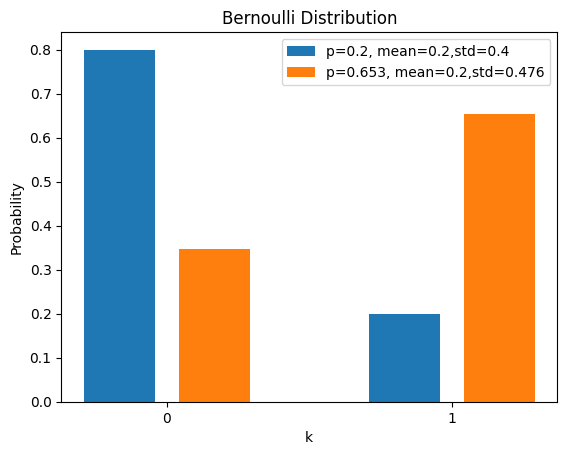

In [78]:
def plt_bernolli():
    ### BEGIN SOLUTION
    plt.figure()
    x = np.arange(0,2)
    p_1 = 0.2
    p_2 = 0.653
    y_1 = [bernoulli(i,p_1) for i in x]
    y_2 = [bernoulli(i,p_2) for i in x]
    bar_width = 0.25
    plt.bar(x-bar_width/1.5,y_1,label=f'p=0.2, mean={p_1},std={np.round(np.sqrt(p_1*(1-p_1)),3)}',width=bar_width)
    plt.bar(x+bar_width/1.5,y_2,label=f'p=0.653, mean={p_1},std={np.round(np.sqrt(p_2*(1-p_2)),3)}',width=bar_width)
    plt.xticks(x, ['0', '1'])
    plt.legend()
    plt.title('Bernoulli Distribution')
    plt.xlabel('k')
    plt.ylabel('Probability')
    plt.show()
    ### END SOLUTION

plt_bernolli()

Explain here the parameters of the Bernoulli distribution

### BEGIN SOLUTION
- $p$: The probability of success (success is when the outcome of 1)

### END SOLUTION

### 2. Binomial Distribution: Plot the pmf for 2 different Binomial distributions
     
- $n=50$, $p=0.2$
- $n=50$, $p=0.6$

**Hint**: Use the `plt.scatter()` function to plot the distributions.

**Hint**: One possible range of visualization is $k \in [0,50]$.

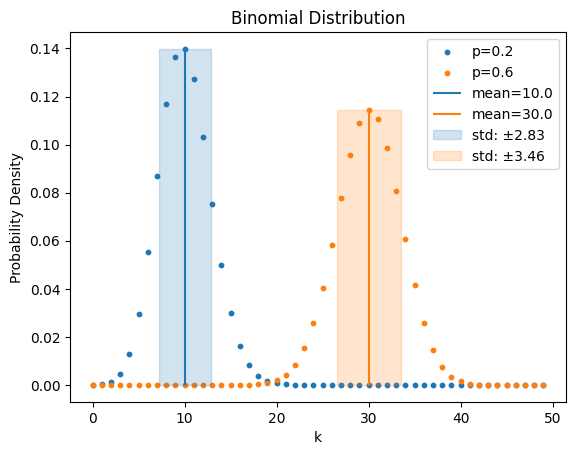

In [79]:
def plt_binomial():
    ### BEGIN SOLUTION
    n= 50
    plt.figure()
    k = np.arange(0,n)
    p_1 = 0.2
    p_2 = 0.6
    y_1 = [binomial(i,n,p_1) for i in k]
    y_2 = [binomial(i,n,p_2) for i in k]
    mean_1 = n*p_1
    mean_2 = n*p_2
    std_1 = np.sqrt(n*p_1*(1-p_1))
    std_2 = np.sqrt(n*p_2*(1-p_2))
    plt.scatter(k,y_1,label=f'p=0.2',s=10.0)
    plt.scatter(k,y_2,label=f'p=0.6',s=10.0)
    plt.vlines(mean_1,ymin=0.0,ymax=binomial(int(mean_1),n,p_1),label=f'mean={mean_1}')
    plt.vlines(mean_2,ymin=0.0,ymax=binomial(int(mean_2),n,p_2),color="C1",label=f'mean={mean_2}')
    plt.fill_betweenx([0, binomial(int(mean_1),n,p_1)], mean_1 - std_1, mean_1 + std_1, color='C0', alpha=0.2, label=f'std: ±{std_1:.2f}')
    plt.fill_betweenx([0, binomial(int(mean_2),n,p_2)], mean_2 - std_2, mean_2 + std_2, color='C1', alpha=0.2, label=f'std: ±{std_2:.2f}')
    plt.legend()
    plt.title('Binomial Distribution')
    plt.xlabel('k')
    plt.ylabel('Probability Density')
    plt.plot()
    ### END SOLUTION

plt_binomial()

Explain here the parameters of the Binomial distribution

### BEGIN SOLUTION
- $n$: Number of independent trials.

- $p$: Probability of success in each trial ($0\le p \le 1 $)

### END SOLUTION

### 3. Poisson Distribution: Plot 2 poisson distributions with the following parameters.

- $\lambda = 1$
- $\lambda = 10$

**Hint**: Use the plt.scatter() function from matplotlib to visualize the distribution.

**Hint**: One possible range of visualisation is $k \in [0,20]$.

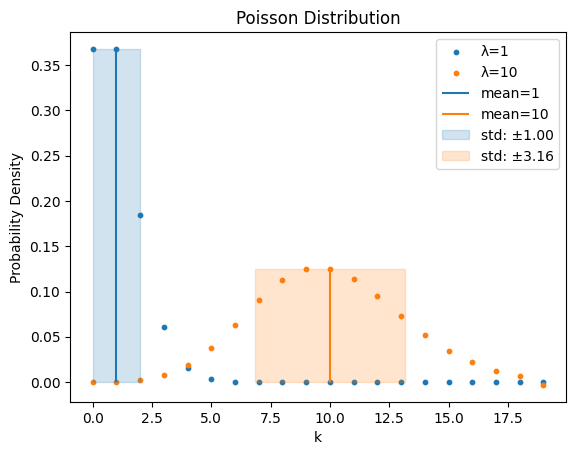

In [80]:
def plt_poisson():
    ### BEGIN SOLUTION
    k = np.arange(0,20)
    lam_1 = 1
    lam_2 = 10
    mean_1 = lam_1
    mean_2 = lam_2
    std_1 = np.sqrt(lam_1)
    std_2 = np.sqrt(lam_2)
    y_1 = [poisson(i,lam_1) for i in k]
    y_2 = [poisson(i,lam_2) for i in k]
    plt.figure()
    plt.scatter(k,y_1,label=f'λ={lam_1}',s=10.0)
    plt.scatter(k,y_2,label=f'λ={lam_2}',s=10.0)

    plt.vlines(lam_1,ymin=0.0,ymax=poisson(int(lam_1),lam_1),label=f'mean={lam_1}')
    plt.vlines(lam_2,ymin=0.0,ymax=poisson(int(lam_2),lam_2),color="C1",label=f'mean={lam_2}')
    plt.fill_betweenx([0, poisson(int(lam_1),lam_1)], mean_1 - std_1, mean_1 + std_1, color='C0', alpha=0.2, label=f'std: ±{std_1:.2f}')
    plt.fill_betweenx([0, poisson(int(lam_2),lam_2)], mean_2 - std_2, mean_2 + std_2, color='C1', alpha=0.2, label=f'std: ±{std_2:.2f}')

    plt.legend()
    plt.title('Poisson Distribution')
    plt.xlabel('k')
    plt.ylabel('Probability Density')
    plt.plot()
    ### END SOLUTION


plt_poisson()


Here explain the parameters of the Poisson distribution

### BEGIN SOLUTION
- $\lambda$: Expected rate of occurences/ Expectation of $\lambda$ events in a given interval.
### END SOLUTION

4. Gaussian Distribution: Plot 2 Gaussian Distribution with the following parameters:
    - $\mu=0$ $\sigma= 5$
    - $\mu = 46$ $\sigma=10$
    

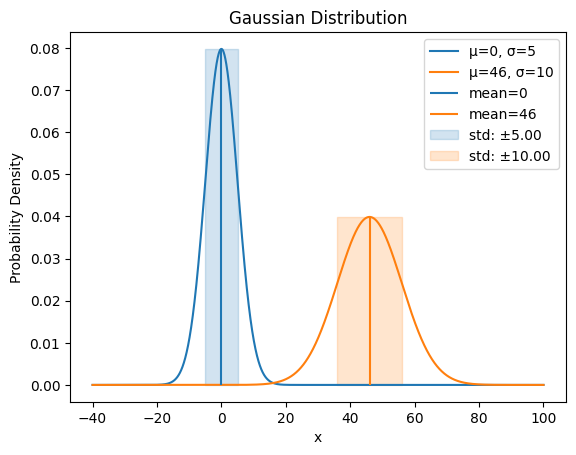

In [81]:
def plt_gaussian():
    ### BEGIN SOLUTION
    x = np.linspace(-40,100,10000)
    mu_1 = 0
    mu_2 = 46
    sigma_1 = 5
    sigma_2 = 10
    y_1 = [gaussian(i,mu_1,sigma_1) for i in x]
    y_2 = [gaussian(i,mu_2,sigma_2) for i in x]
    plt.figure()
    plt.plot(x,y_1,label=f'μ={mu_1}, σ={sigma_1}')
    plt.plot(x,y_2,label=f'μ={mu_2}, σ={sigma_2}')
    plt.vlines(mu_1,ymin=0.0,ymax=gaussian(mu_1,mu_1,sigma_1),label=f'mean={mu_1}')
    plt.vlines(mu_2,ymin=0.0,ymax=gaussian(mu_2,mu_2,sigma_2),color="C1",label=f'mean={mu_2}')
    plt.fill_betweenx([0, gaussian(mu_1,mu_1,sigma_1)], mu_1 - sigma_1, mu_1 + sigma_1, color='C0', alpha=0.2, label=f'std: ±{sigma_1:.2f}')
    plt.fill_betweenx([0, gaussian(mu_2,mu_2,sigma_2)], mu_2 - sigma_2, mu_2 + sigma_2, color='C1', alpha=0.2, label=f'std: ±{sigma_2:.2f}')
    plt.legend()
    plt.title('Gaussian Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.show()
    ### END SOLUTION


plt_gaussian()

Explain here the parameters of the Gaussian distribution

### BEGIN SOLUTION
- $\mu$: Mean (location parameter)
- $\sigma$: Standard deviation (scale parameter)
### END SOLUTION

## Question 1.3.
Explain the relationship between Bernoulli and binomial, binomial and Poisson, binomial and Gaussian.

### 1. Bernoulli and bionmial

### BEGIN SOLUTION
- The Bernoulli distribution is a special case of the binomial distribution with $n = 1$ trial.
- Bernoulli: A single binary outcome (e.g., success/failure).
- Binomial: Sum of $n$ independent Bernoulli trials.
### END SOLUTION

### 2. Binomial and Poisson

### BEGIN SOLUTION
- The **Poisson distribution** is a limiting case of the **Binomial distribution** under specific conditions:
  - The number of trials $n$ is very large.
  - The probability of success $p$ is small.

- Rule of thumb for approximation:
  - If $ n \geq 100$ and $np \leq 10$, the Poisson distribution approximates the Binomial distribution.

- The approximation uses the parameter:
  - $\lambda = np$, where $ \lambda $ is the mean of the Poisson distribution.

 Formally, if $X \sim \text{Binomial}(n, p) $ and $n \to \infty $, $ p \to 0 $, with $ np = \lambda $, then:
  - $ X \to \text{Poisson}(\lambda) $.

- This relationship is useful for modeling rare events over large populations or intervals.



### END SOLUTION

### 3. Binomial and Gaussian

### BEGIN SOLUTION
- The **Gaussian distribution** (normal distribution) is an approximation of the **binomial distribution** for large $n$, based on the **Central Limit Theorem**.

- If $X \sim \text{Binomial}(n, p)$, then for large $n$:
  - $X$ can be approximated by $\mathcal{N}(\mu, \sigma^2)$, where:
    - $\mu = np$ (mean).
    - $\sigma^2 = np(1-p)$ (variance).

- This approximation works best when $p$ is not too close to $0$ or $1$. For extreme $p$ values, the skewness of the binomial distribution reduces the accuracy of the Gaussian approximation.
### END SOLUTION


## Question 2.1: Transformations
Suppose $X$ is a continuous random variable with pdf $f_X$ and cdf $F_X$.
Let $Z = |X|$. First, show that the cdf $F_Z$ of $Z$ is given by $F_Z(z) = F_X(z) - F_X(-z)$. Then, show that the pdf $f_Z$ of $Z$ is given by $f_Z(z) = f_X(z) + f_X(-z)$.

**Hint**: Think about how you can use property $Z=|X|$ to solve this task.

### BEGIN SOLUTION

CDF derivation:
$$
\begin{aligned}
& F_Z(z)=P(Z \leq z)=P(|X| \leq z) \\
& |X| \leq z:-z \leq X \leq z \\
& F_Z(z)=P(-z \leq X \leq z) \\
& F_X(z)=P(X \leq z) \\
& F_Z(z)=P(X \leq z)-P(X \leq -z) \\
& F_Z(z)= F_X(z) - F_X(-z)
\end{aligned}
$$
PDF derivation:
$$
\begin{aligned}
F_Z(z) & = F_X(z) - F_X(-z) \\
f_Z(z) & = \frac{d}{dz} F_Z(z) \\
f_Z(z) & = \frac{d}{dz} \big(F_X(z) - F_X(-z)\big) \\
f_Z(z) & = \frac{d}{dz} F_X(z) - \frac{d}{dz} F_X(-z) \\
f_Z(z) & = f_X(z) + f_X(-z)
\end{aligned}
$$


### END SOLUTION

## Question 2.2: Change of variable
Let $Y = a + bX$ with $a \in \mathbb{R}$ and $b \in \mathbb{R} \setminus 0$. Show that the pdf $p_Y$ of $Y$ is given by $p_Y(y) = \frac{1}{|b|}p_X(\frac{y-a}{b}).$

### BEGIN SOLUTION
$$
\begin{aligned}
Y & = a + bX, \quad a \in \mathbb{R}, \, b \in \mathbb{R} \setminus \{0\} \\
X & = \frac{Y - a}{b} \\
p_Y(y) & = p_X\left(g^{-1}(y)\right) \left| \frac{d}{dy} g^{-1}(y) \right| \\
g^{-1}(y) & = \frac{y - a}{b} \\
\frac{d}{dy}g^{-1}(y) & = \frac{1}{b}, \quad \left| \frac{d}{dy} g^{-1}(y) \right| = \frac{1}{|b|} \\
p_Y(y) & = p_X\left(\frac{y - a}{b}\right) \frac{1}{|b|} \\
p_Y(y) & = \frac{1}{|b|} p_X\left(\frac{y - a}{b}\right)
\end{aligned}
$$
### END SOLUTION

## Question 3.1: Categorical Distribution
We can represent a categorical distribution using an array, e.g., `p = np.array([0.1, 0.2, 0.7])`.
Write a function `plot_categorical(p: np.ndarray)` that creates a plot of the distribution given a probability array `p`.

**Note**: Implement the function so that the number of categories can be chosen arbitrarily.

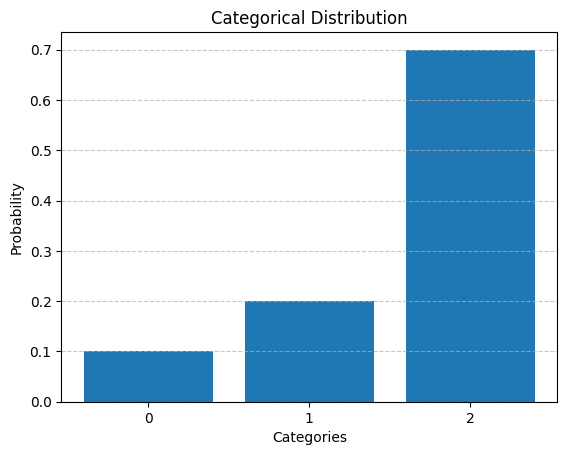

In [82]:
def plot_categorical(p: np.ndarray):
    ### BEGIN SOLUTION
    #       
    # Categories
    categories = np.arange(len(p))
    max_category_label_num = 10                   # Avoid to plot too many x labels

    # Plotting
    plt.bar(categories, p)
    plt.xticks(categories[::len(p)//max_category_label_num+1])
    plt.xlabel("Categories")
    plt.ylabel("Probability")
    plt.title("Categorical Distribution")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    ### END SOLUTION

p = np.array([0.1, 0.2, 0.7])
plot_categorical(p)

## Question 3.2: Convolution
Write a convolution function that given two categorical distributions computes their convolution. Implement the convolution computation on your own and **do not** use already implemented functions from libraries.

In [83]:

def compute_convolution(p1:np.ndarray, p2:np.ndarray):
    ### BEGIN SOLUTION
    if not np.isclose(p1.sum(), 1) or not np.isclose(p2.sum(), 1):
        raise ValueError("Both input arrays must represent valid probability distributions (sum to 1).")
    if (p1 < 0).any() or (p2 < 0).any():
        raise ValueError("Probabilities cannot be negative.")
    
    result_size = p1.shape[0] + p2.shape[0] - 1

    result = np.zeros(result_size)
    for i in range(result_size):
        for j in range(max(0, i - p2.shape[0] + 1), min(i + 1, p1.shape[0])):
            result[i] += p1[j] * p2[i - j]
    
    return result
    ### END SOLUTION

    

### PUBLIC TESTS


In [84]:
test_cases = [((np.array([0.2, 0.8]), np.array([0.3, 0.7])), np.array([0.06, 0.38, 0.56])),((np.array([0.1, 0.9]), np.array([0.2, 0.5,0.3])), np.array([0.02, 0.23, 0.48,0.27]))]
for i,((p1, p2), sol) in enumerate(test_cases):
    test_almost_equal_array(f"convolution {i}", compute_convolution(p1, p2), sol)
    test_almost_equal(f"Sum convolution {i}",np.sum(compute_convolution(p1,p2)),1)

Test convolution 0: passed.
Test Sum convolution 0: passed.
Test convolution 1: passed.
Test Sum convolution 1: passed.


### Visualisation
If your convolution is implemented correctly. We can now use the `plot_categorical` function to visualize the convolution.

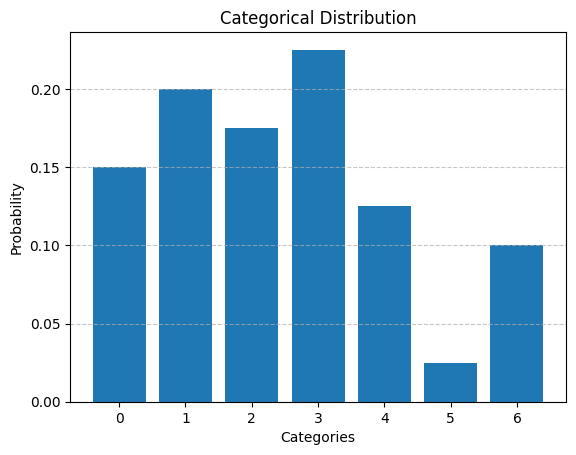

In [85]:
p1 = np.array([0.5, 0.0, 0.5])
p2 = np.array([0.3, 0.4, 0.05,0.05,0.2])

result = compute_convolution(p1, p2)
plot_categorical(result)

## Question 3.3.1
Implement the function `convolve_n_times(p:np.ndarray,n:int)` that computes the convolution of $N$ independent and identically distributed categorical random variables. Use the functions `compute_convolution` from before.

In [86]:
def convolve_n_times(p: np.ndarray,n:int):
    ### BEGIN SOLUTION
    result = p
    for _ in range(n):
        result = compute_convolution(result,p)
    return result
    ### END SOLUTION

In [87]:
### PUBLIC TESTS
test_cases = [((np.array([0.2, 0.8]), 3), np.array([0.0016, 0.0256, 0.1536, 0.4096, 0.4096])),((np.array([0.1, 0.9]), 10), np.array([1.00000000e-11, 9.90000000e-10, 4.45500000e-08, 1.20285000e-06,2.16513000e-05, 2.72806380e-04 ,2.45525742e-03, 1.57837977e-02
 ,7.10270897e-02,2.13081269e-01, 3.83546284e-01, 3.13810596e-01]))]

for i,((p1, n), sol) in enumerate(test_cases):
    test_almost_equal_array(f"convolution {i}", convolve_n_times(p1, n), sol)
    test_almost_equal(f"Sum convolution {i}",np.sum(convolve_n_times(p1,n)),1)

Test convolution 0: passed.
Test Sum convolution 0: passed.
Test convolution 1: passed.
Test Sum convolution 1: passed.


## Question 3.3.2
Now we plot the convolution for $N=1$, $N=10$, $N=100$, $N=1000$. What do you notice?

**Hint**: Think about the Central Limited Theorem

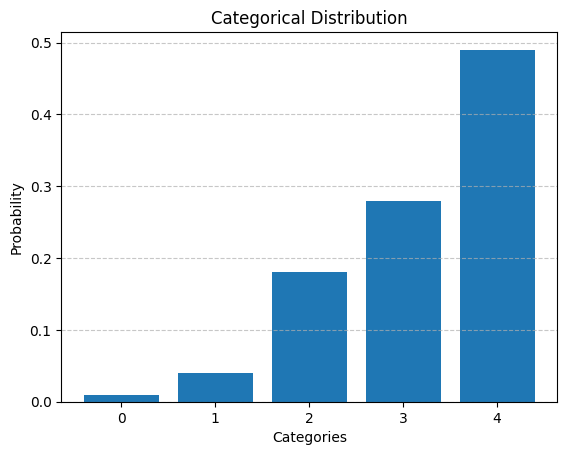

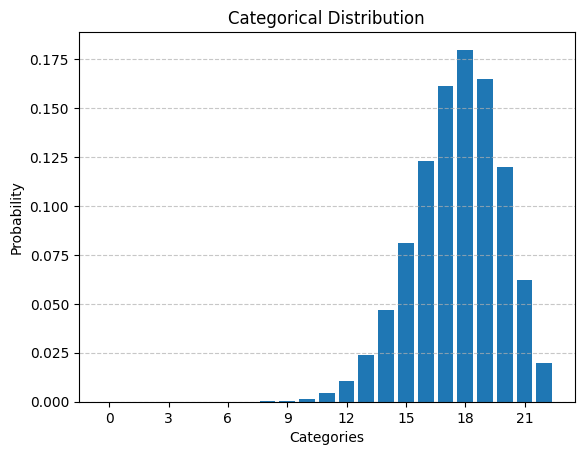

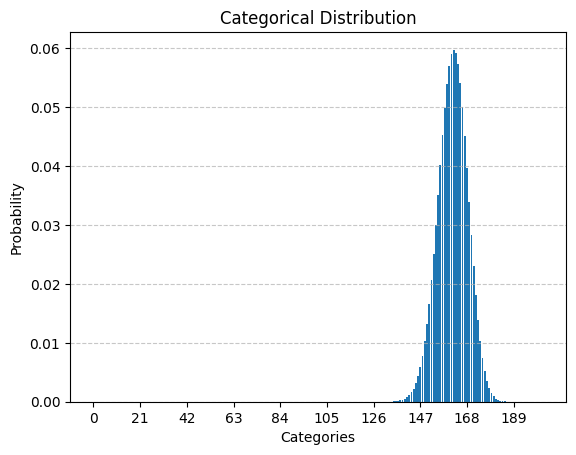

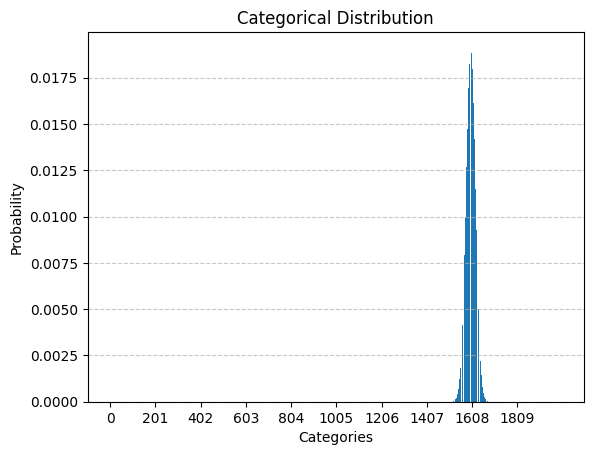

In [88]:
p = np.array([0.1, 0.2, 0.7])
result_1 = convolve_n_times(p, 1)
result_10 = convolve_n_times(p, 10)
result_100 = convolve_n_times(p, 100)
result_1000 = convolve_n_times(p, 1000)

plot_categorical(result_1)
plot_categorical(result_10)
plot_categorical(result_100)
plot_categorical(result_1000)

### BEGIN SOLUTION
#### Key Observations:

1. **For $ N = 1 $**:
   - The resulting distribution is the same as the original categorical distribution. The probabilities for each category remain unchanged, with no smoothing or blending of categories.
   
2. **For $ N = 10 $**:
   - The distribution starts to smooth out, and the individual categories become less distinct. The shape begins to look more continuous, though it may still have some irregularities.
   
3. **For $ N = 100 $**:
   - The convolution process smooths out the distribution significantly. The resulting distribution starts resembling a **bell curve**, though still discrete. The probabilities become more spread out and the distribution appears more symmetric.
   
4. **For $ N = 1000 $**:
   - The distribution is nearly **Gaussian**. As the number of convolutions increases, the distribution becomes almost continuous and symmetric, resembling a normal distribution. This outcome is a direct result of the **Central Limit Theorem (CLT)**, which asserts that the sum of many independent random variables (even from non-normal distributions) tends to a normal distribution.

#### Why This Happened:

- **Central Limit Theorem (CLT)**:
   - According to the CLT, when you sum a large number of i.i.d. random variables (regardless of their original distribution), the resulting sum (or average) will approximate a normal distribution.
   - In the case of categorical distributions, when you convolve many such distributions, the resulting sum becomes increasingly symmetric and bell-shaped. This phenomenon occurs even if the original distribution is discrete and non-Gaussian.
   
- **Gaussian Approximation**:
   - As $ N $ increases the convolution of many categorical distributions effectively "smooths" the distribution, causing it to approximate a Gaussian distribution. The discrete probabilities blend in such a way that the resulting distribution becomes increasingly continuous and normal-like.

- **Implication**:
   - This result demonstrates the power of the Central Limit Theorem, where the sum (or convolution) of many independent random variables, regardless of the original distribution, will eventually approach a normal distribution as  $N$ grows larger.

### END SOLUTION

## Question 4: Mixture Models

### Q4.1: Mean and Variance of Gaussian Mixture Models
Derive the mean and variance of a Gaussian Mixture Model.

### BEGIN SOLUTION
**Mean**

$$\mathbb{E}(X)=\int xp(x)\,dx \ = \int x \sum_k \pi_k \mathcal{N}(x|\mu_k,\sigma_k^2)\,dx \ = \sum_k \pi_k \int x\mathcal{N}(x|\mu_k,\sigma_k^2)\,dx \ = \sum_k \pi_k \mu_k$$

**Variance** 
$$\mathbb{V}(X)=\mathbb{E}(X^2) - (\mathbb{E}(X))^2$$

$$\mathbb{E}(X^2) = \int x^2p(x)\,dx \ = \int x^2 \sum_k \pi_k \mathcal{N}(x|\mu_k,\sigma_k^2)\,dx \ = \sum_k \pi_k \int x^2 \mathcal{N}(x|\mu_k,\sigma_k^2)\,dx \ = \sum_k \pi_k \mathbb{E}(X_k^2)$$

$$\mathbb{E}(X_k^2) = \mathbb{V}(X_k)+\mu_k^2 = \sigma_k^2 + \mu_k^2$$

$$\mathbb{E}(X^2) = \sum_k \pi_k (\mu_k^2 + \sigma_k^2)$$

$$\mathbb{V}(X)=\sum_k \pi_k (\sigma_k^2 + \mu_k^2) - (\sum_k \pi_k\mu_k)^2$$

### END SOLUTION


### Q4.2: Mixture Model Class
Implement the following functions to complete the `GaussianMixtureModel` class.

a) PDF: Implement the pdf of the mixture of Gaussians in `pdf`.

b) Sampling:
Implement a function that draws a sample from a Gaussian Mixture Model. Sampling consists of two steps:
First, sample which mixture component should be used.
Second, sample from the corresponding Gaussian.

In [89]:
class GaussianMixtureModel:

    def __init__(self, pi, mus, sigmas, seed=0) -> None:
        self.n = len(mus)
        self.pi = pi
        self.mus = mus
        self.sigmas = sigmas
        np.random.seed(seed)
    
    def pdf(self, x):
        ### BEGIN SOLUTION
        return sum([pi*gaussian(x, mu, sigma) for pi, mu, sigma in zip(self.pi, self.mus, self.sigmas)])
        ### END SOLUTION

    def sample(self, n_samples: int):
        ### BEGIN SOLUTION
        # 1. Sample which mixture component to use
        p = np.random.choice(a=self.n, p=self.pi, size=n_samples)
        # 2. Sample from this Gaussian
        sample = np.array([np.random.normal(self.mus[k], self.sigmas[k], size=1) for k in p])[:, 0]
        return sample
        ### END SOLUTION
    

In [90]:
# PDF test
import scipy
test_cases = [
    (([0.3, 0.7], [1, 0], [1, 4], 42, 2), 0.13420),
    (([1], [0], [0.1], 42, 0), 3.98942),
    (([1], [0], [0.1], 42, 1), 0),
    (([0.2, 0.5, 0.3], [1, 0, 5], [1, 4, 0.2], 42, 5), 0.62127),
    (([0.2, 0.3, 0.4, 0.1], [1, 0, 5, 2], [2, 4, 0.2, 1], 42, 1), 0.09309),
]
for i, ((pi, mu, sigma, seed, x), sol) in enumerate(test_cases):
    # Compute DGL step using your function
    model = GaussianMixtureModel(
        pi=pi,
        mus=mu,
        sigmas=sigma,
        seed=seed
    )
    pred = model.pdf(x)
    test_almost_equal(f'{i}', pred, sol)

Test 0: passed.
Test 1: passed.
Test 2: passed.
Test 3: passed.
Test 4: passed.


In [91]:
# Sampling test
test_cases = [
    (
        ([0.3, 0.7], [1, 0], [1, 4], 42, 10),
        ([-1.87789754,  2.17024017, -1.85367077, -1.86291901,  1.24196227, -0.91328024, -0.72491783, -2.24915012, -4.05132448,  1.25698933])
    )
]

for i, ((pi, mu, sigma, seed, n_samples), sol) in enumerate(test_cases):
    # Compute DGL step using your function
    model = GaussianMixtureModel(
        pi=pi,
        mus=mu,
        sigmas=sigma,
        seed=seed
    )
    pred = model.sample(n_samples)
    test_shape_equal(f'{i} [shape]', pred, (n_samples,))
    test_almost_equal_array(f'{i} [vals]', pred, sol)

Test 0 [shape]: passed.
Test 0 [vals]: passed.


## Question 5: Non-Parametric Models

In [92]:
model = GaussianMixtureModel(
    pi=[0.2, 0.25, 0.4, 0.15],
    mus=[-1, 0, 3, 9],
    sigmas=[1, 4, 2, 0.5],
    seed=0
)

### Q5.1: Sampling
Sample a dataset of points using the mixture model defined above. 
In a single plot, plot:

1. The distribution of points in a histogram.
2. The corresponding ground-truth distribution (mixture of Gaussians).

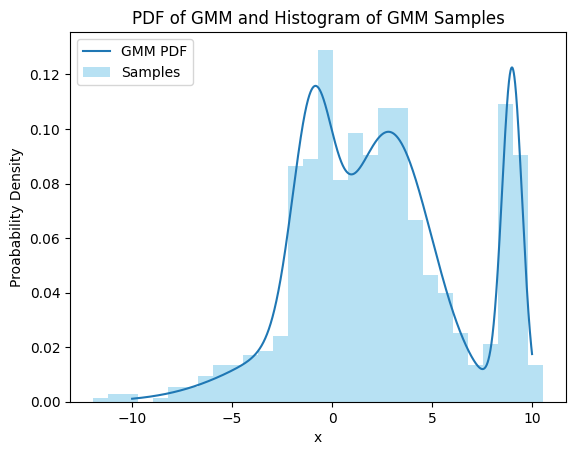

In [93]:
### BEGIN SOLUTION
def plot_mixture():
    xs = np.linspace(-10, 10, 10000)
    ys = [model.pdf(x) for x in xs]
    plt.plot(xs, ys, label='GMM PDF')
    samples = model.sample(1000)
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', label="Samples")
    plt.xlabel('x')
    plt.ylabel('Proabability Density')
    plt.legend()
    plt.title('PDF of GMM and Histogram of GMM Samples')
    plt.show()
plot_mixture()
### END SOLUTION

### Q5.2: Kernels
Implement the following kernels:
1. Uniform
2. Epanechnikow
3. Gaussian

In [94]:
def uniform_kernel(x):
    ### BEGIN SOLUTION
    return 0.5 if np.abs(x)<=1 else 0
    ### END SOLUTION

def epanechnikov_kernel(x):
    ### BEGIN SOLUTION
    return 0.75*(1-x**2) if np.abs(x)<=1 else 0
    ### END SOLUTION

def gaussian_kernel(x):
    ### BEGIN SOLUTION
    return (2*np.pi)**-0.5 * np.exp(-0.5*x**2)
    ### END SOLUTION

In [95]:
# Kernel test
test_cases = [
    (1, (0.5, 0, 0.24197)),
    (2, (0., 0, 0.0539)),
    (0.1, (0.5, 0.7425, 0.39695)),
]

for i, (x, (s1, s2, s3)) in enumerate(test_cases):
    # Compute DGL step using your function
    p1 = uniform_kernel(x)
    p2 = epanechnikov_kernel(x)
    p3 = gaussian_kernel(x)
    print(p3)
    # print(pred)
    test_almost_equal(f'{i} [uniform]', p1, s1)
    test_almost_equal(f'{i} [epanechnikov]', p2, s2)
    test_almost_equal(f'{i} [gaussian]', p3, s3)


0.24197072451914337
Test 0 [uniform]: passed.
Test 0 [epanechnikov]: passed.
Test 0 [gaussian]: passed.
0.05399096651318805
Test 1 [uniform]: passed.
Test 1 [epanechnikov]: passed.
Test 1 [gaussian]: passed.
0.39695254747701186
Test 2 [uniform]: passed.
Test 2 [epanechnikov]: passed.
Test 2 [gaussian]: passed.


### Q5.3: Kernel Density Estimation
Given points and a kernel, compute the kernel density estimation.

In [96]:
def compute_kde(x, kernel_fct, pts, h):
    ### BEGIN SOLUTION
    N = len(pts)
    return 1/(N*h) * np.sum([kernel_fct((x-x_k)/h) for x_k in pts])
    ### END SOLUTION

In [97]:
# KDE Test 

test_cases = [
    ((1, np.linspace(-10, 10, 100), 0.1), (0.05, 0.01302, 0.04875)),
    ((2, np.linspace(-10, 10, 100), 0.8), (0.05, 0.04984, 0.0495)),
]

for i, ((x, pts, h), (s1, s2, s3)) in enumerate(test_cases):
    # Compute DGL step using your function
    p1 = compute_kde(x, uniform_kernel, pts, h)
    p2 = compute_kde(x, epanechnikov_kernel, pts, h)
    p3 = compute_kde(x, gaussian_kernel, pts, h)
    test_almost_equal(f'{i} [uniform]', p1, s1)
    test_almost_equal(f'{i} [epanechnikov]', p2, s2)
    test_almost_equal(f'{i} [gaussian]', p3, s3)

Test 0 [uniform]: passed.
Test 0 [epanechnikov]: passed.
Test 0 [gaussian]: passed.
Test 1 [uniform]: passed.
Test 1 [epanechnikov]: passed.
Test 1 [gaussian]: passed.


### Q5.4: Plot the kernel density estimation alongside the ground-truth distribution
Create a single plot, containing the following:
1. The ground truth Gaussian mixture distribution from 5.1
2. The sampled points in a histogram
3. The uniform KDE for $h=0.05$, $0.2$, $1$
4. The Epanechnikov KDE for $h=0.05$, $0.2$, $1$
5. The Gaussian KDE for $h=0.05$, $0.2$, $1$

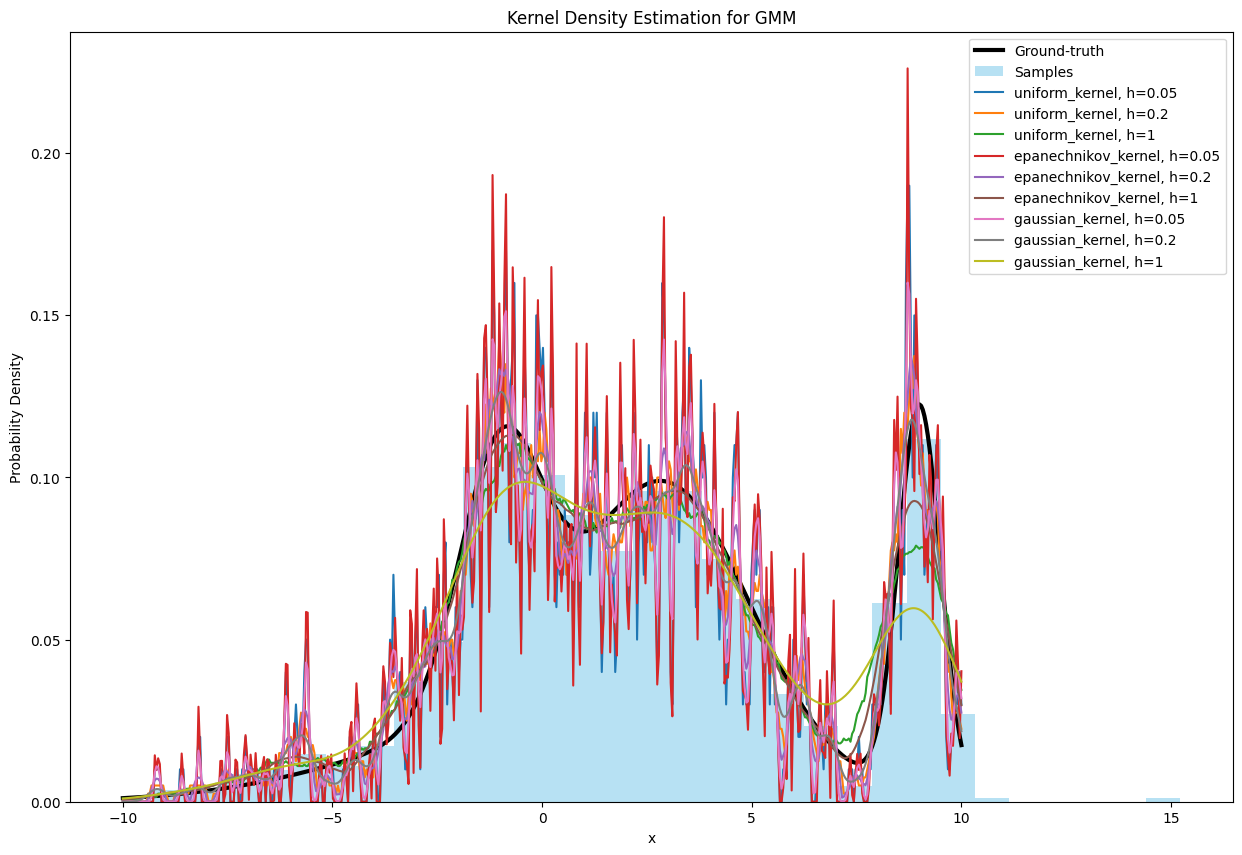

In [98]:
### BEGIN SOLUTION
def plot_kde():
    plt.figure(figsize=(15, 10))
    xs = np.linspace(-10, 10, 500)
    ys = [model.pdf(x) for x in xs]
    # Ground truth
    plt.plot(xs, ys, label='Ground-truth', linewidth=3, color='black')
    # Samples
    samples = model.sample(1000)
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', label="Samples")
    for kernel_fct in [uniform_kernel, epanechnikov_kernel, gaussian_kernel]:
        for h in [0.05, 0.2, 1]:
            # Uniform KDE
            y = [compute_kde(x, kernel_fct, samples, h) for x in xs]
            plt.plot(xs, y, label=f'{kernel_fct.__name__}, h={h}')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.title('Kernel Density Estimation for GMM')
    plt.show()
plot_kde()
### END SOLUTION

# Part 2: Parametric Density Estimation

In [99]:
from scipy.stats import binom
from scipy.stats import beta as beta_dist

## Question 1: MLE for Categorical Distributions
Let's consider an experiment with $K$ different outcomes. The outcomes are modeled as a one-hot encoding
        $$\boldsymbol{x}\in\{0, 1\}^K; \qquad \sum_{i=1}^{K} x_i = 1$$

We chose to model the outcome of the experiment by a random variable $X$ which is distributed as categorical distribution with probability-mass function (pmf) $f(\boldsymbol{x};\boldsymbol{\theta}) = \prod_{i=1}^{K}\theta_i^{x_i}$ where $\theta_i$ represents the probability of $x_i$. Thus, we need to make sure that $\sum_{i = 1}^K \theta_i = 1$.
        
Assume now that we are given a set of data $\mathcal{D} = \{\boldsymbol{x}_j|j=1,\dots,N\}$. Please derive the parameters of the categorical distribution $\theta_i^{\mathrm{ml}}$ that maximize the pmf given the data $\mathcal{D}$.

_Hint 1_: If you do it right, the (not explicitly mentioned) constraint $\forall i: \theta_i \in [0, 1]$ is always fulfilled by the optimal solution. So you can safely ignore it in your derivations.\
_Hint 2_: Rewrite the constraint $\sum_{i=1}^{K} \theta_i = 1$ as $\theta_K = 1 - \sum_{i=1}^{K-1} \theta_i$.

### BEGIN SOLUTION
We will use maximum likelihood estimation 

$$\underset{\boldsymbol{\theta}}{\operatorname{argmax}}f(\mathcal{D}|\boldsymbol{\theta}) = \underset{\boldsymbol{\theta}}{\operatorname{argmax}} \log f(\mathcal{D}|\boldsymbol{\theta})$$
        
As the logarithm is a monotonically increasing function, we can introduce it to the optimization without loss of generality. We further assume that the data is i.i.d. which allows reformulation as

\begin{align*}
    \underset{\boldsymbol{\theta}}{\operatorname{argmax}} \log f(\mathcal{D}|\boldsymbol{\theta}) \overset{\mathrm{i.i.d.}}{=} &\underset{\boldsymbol{\theta}}{\operatorname{argmax}}\log \prod_{j=1}^{N}\prod_{i=1}^{K} f(\boldsymbol{x}_j|\theta)\\
    = &\underset{\boldsymbol{\theta}}{\operatorname{argmax}} \sum_{j=1}^{N}\sum_{i=1}^{K} \log f(\boldsymbol{x}_j|\theta)\\
    = &\underset{\boldsymbol{\theta}}{\operatorname{argmax}} \sum_{j=1}^{N}\sum_{i=1}^{K} x_{ij} \log \theta_i 
\end{align*}
        
The optimal solution can be found where the gradient of the loss with respect to the parameter $\theta_i$ vanishes. As the log is concave, we see that this is a global optimum. We further use that the constraint $\sum_{i=1}^{K} \theta_i = 1$ can be rewritten as $\theta_K = 1 - \sum_{i=1}^{K-1} \theta_i$. Thus, we formulate the loss for $\theta_1, ..., \theta_{K-1}$ as 
        
$$\mathcal{L}(\theta_1, \dots, \theta_{K-1}): = \sum_{j=1}^{N}(\sum_{i=1}^{K-1} x_{ij} \log \theta_i) + x_{Kj} \log (1 - \sum_{i=1}^{K-1}(\theta_i)).$$

The gradient then reads as
 
$$\left.\nabla_{\theta_i} \mathcal{L}(\boldsymbol{\theta})\right|_{\theta_i = \theta_i^{ml}} = \sum_{j=1}^{N}\frac{x_{ij}}{\theta_i^{ml}} - \frac{x_{Kj}}{1 - \sum_{k=1}^{K-1}\theta_k^{ml}} = 0.$$

Reformulation yields

$$\sum_{j=1}^{N}x_{Kj}~\theta_i^{ml} = (\sum_{j=1}^{N} x_{ij}) (1 - \sum_{k=1}^{K-1} \theta_k^{ml})$$
        
We denote $\sum_{j} x_{ij} = N_i$ by the number of occurrences of $i$.
\begin{align*}
    N_K \theta_i^{ml} &= N_i (1-\sum_{i=1}^{K-1}\theta_k^{ml}) ) = N_i \theta^{ml}_K \\
\end{align*}

By summing for all $i$ 's on both sides, we get
$$
\begin{align*}
N_K \sum_{i=1}^{K} \theta_i^{ml} &= \sum_{i=1}^{K} N_i \theta^{ml}_K \\
N_K &= N \theta^{ml}_K
\end{align*}
$$
i.e., $\theta^{ml}_K = \frac{N_K}{N}$
        
If we plug that in the above we receive the maximum likelihood estimate

$$
N_K \theta_i^{ml} = N_i \theta^{ml}_K = N_i \frac{N_K}{N}
$$

i.e., $\theta^{ml}_i = \frac{N_i}{N} \quad \forall i \in [1, K]$

NOTE: It follows usual intuition that that relative frequency of occurence of $i$ $\approx$ probability $i$

### END SOLUTION

## Question 2: Modelling a Dice
We now consider an experiment where we throw a dice. 
Which distribution would you choose to model the outcome that we throw a 6. Please state the parameters of your chosen distribution and derive the maximum likelihood parameters. How is your chosen distribution connected to the Categorical distribution?

Hint: You don't need to do all calculations again to obtain the maximum likelihood parameters.

### BEGIN SOLUTION
We model the throw of a dice with a Bernoulli distribution and a binary random variable which denotes the event of hitting a 6 or not. The pmf of a Bernoulli distribution is
       
$$\mathrm{Bernoulli}(x;\theta) = \theta^{x} (1-\theta)^{x}$$
        
The parameter is the probability of throwing a 6. It can be seen that the Bernoulli distribution is the Categorical distribution for the case $K=2$ and thus the maximum likelihood estimate is $\theta=N_1 / N$, i.e., the fraction of numbers that a six was hit.
### END SOLUTION

## Question 3: Modelling m Dice
Next up, we consider throws with $m$ dice. To determine how many 6s we can throw with $m$ dice, we model the experiment by a binomial distribution. 
The random variable $X$ can take values in $x\in\{1,\dots, n\}$ modeling how many times we threw a 6 with $m$ dice. 
The pmf for the binomial is
        
$$f_n(x;\theta) = \begin{pmatrix}
            n\\x
  \end{pmatrix} \theta^{x} (1-\theta)^{n-x}.$$
        
Here $m$ denotes the number of dice, $x$ denotes the number of times that a 6 has been thrown, and $\theta$ is the probability of throwing a 6.
  
The maximum likelihood estimate of the binomial distribution given a dataset $\mathcal{D}$ can be shown to be
        
$$\theta^{\mathrm{ml}} = \frac{1}{N} \sum_{i=1}^{N} \frac{x_i}{m}.$$
        
Please plot the data, which you can collect for $m=10$ throws using the code below, against the binomial distribution with the maximum likelihood estimate $\theta^{\mathrm{ml}}$ for the $N=10, 100, 1000$ first data points in the dataset. Describe the differences between the three plots.

In [100]:
M = 10
P = 1 / 6


def draw_binomial(n: int):
    rng = np.random.default_rng(42)
    return rng.binomial(M, P, size=n)


DATA = draw_binomial(1000)

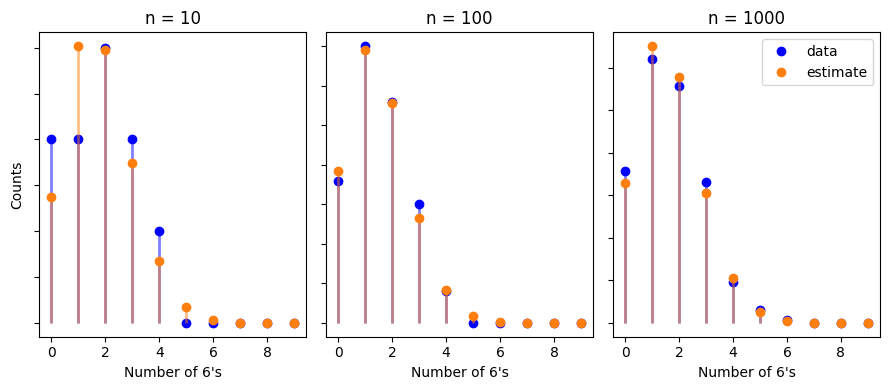

In [101]:
### BEGIN SOLUTION
EVAL_POINTS = [10, 100, 1000]


def maximum_likelihood_estimator(data: np.ndarray):
    return np.mean(data / M)


def plot_data(ax: plt.Axes, data: np.ndarray):
    x = np.arange(M)
    counts = np.zeros(M)
    for i in range(M):
        # Empirical counts
        counts[i] = np.count_nonzero(data == i)
    counts = counts / data.size
    ax.plot(x, counts, "o", label="data", color="b")
    ax.vlines(x, 0, counts, color="b", lw=2, alpha=0.5)
    return ax


def plot_binomial(ax: plt.Axes, data: np.ndarray):
    x = np.arange(M)
    ml_estimate = maximum_likelihood_estimator(data)
    pmf = np.zeros(M)
    for i in range(M):
        # Empirical counts
        pmf[i] = binom.pmf(i, M, ml_estimate)
    ax.plot(x, pmf, "o", color="tab:orange", label="estimate")
    ax.vlines(x, 0, pmf, color="tab:orange", lw=2, alpha=0.5)
    return ax


fig, axs = plt.subplots(1, len(EVAL_POINTS), figsize=(9,4))
for i, (ax, n) in enumerate(zip(axs, EVAL_POINTS)):
    plot_data(ax, DATA[:n])
    plot_binomial(ax, DATA[:n])
    ax.set_title(f"n = {n}")
    ax.set_yticklabels([])
    if i == len(EVAL_POINTS) - 1:
        ax.legend(loc="upper right")
    if i==0:
        ax.set_ylabel('Counts')
    ax.set_xlabel("Number of 6's")
plt.tight_layout()

plt.show()
### END SOLUTION

We can see that the data matches better with higher number of data points, i.e. if more evidence is available.

## Question 4: Parameter Priors
The beta distribution is a continuous univariate distribution over $\theta$, parameterized by $\alpha$ and $\beta$ with pdf
        
\begin{align*}
    \mathrm{beta}(\theta;\alpha, \beta) &= \frac{1}{\mathrm{B}(\alpha, \beta)} \theta^{\alpha - 1}(1-\theta)^{\beta - 1}; \quad \theta\in(0,1)\\
    \mathrm{B}(\alpha, \beta) &= \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha +  \beta)}
\end{align*}
        
Here $\mathrm{B}(\alpha, \beta)$ is the beta-function, represented by the gamma-function, which acts as a normalization constant. 
The term is not required for further calculations and thus, we will not further introduce it.

Let's assume that the parameters $\theta$ of the binomial distribution $\mathrm{binomial}_n(x|\theta)$ introduced in Question 3 are random variables. 
We define the prior over the parameters by a beta distribution with $\alpha_0$, $\beta_0$. 
Calculate the posterior of the likelihood under the beta prior. Which type of distribution does the posterior assume? 
How is this concept called in the literature?

Hint: Please elaborate if you need to explicitly calculate the evidence. 
Use the fact that the posterior is proportional to the joint distribution.

### BEGIN SOLUTION
The posterior is connected to the likelihood and the prior through Bayes' theorem
            
$$p(\theta|x) = \frac{p(x|\theta) p(\theta)}{p(x)} = \frac{\mathrm{binomial}_n(x|\theta)~\mathrm{beta}(\theta; \alpha, \beta)}{p(x)}.$$
            
We first calculate the joint distribution $p(x, \theta) = p(x|\theta) p(\theta)$

$$p(x, \theta) = \begin{pmatrix}
    n\\x
\end{pmatrix} \frac{1}{\mathrm{B}(\alpha, \beta)} \theta^{\alpha + x - 1} (1-\theta)^{\beta + n - x - 1}$$
       
We now consider the fact that the posterior is proportional to the joint distribution
\begin{align*}
    p(\theta|x) &\propto \begin{pmatrix}
        n\\x
    \end{pmatrix} \frac{1}{\mathrm{B}(\alpha, \beta)} \theta^{\alpha + x - 1} (1-\theta)^{\beta + n - x - 1}\\
    &= Z \theta^{\alpha + x - 1} (1-\theta)^{\beta + n - x - 1}
\end{align*}
            
We can see that the first part is independent of $\theta$ and can thus be considered as constant.
From the last equation, we can deduce that the posterior has the form of a beta-distribution with unknown normalization constant $Z$. 
Since the normalization constant is unique, it must be the beta-distribution's normalization constant $1 / \mathrm{B}(\alpha + x, \beta + n - x)$.
Thus, the resulting posterior is $\mathrm{beta}(\theta; \alpha + x, \beta + n - x)$.

Intuitively, this means that after adding new data and updating our belief about the underlying binomial parameters $\theta$, the resulting belief distribution is again a beta distribution.
Hence, we can repeat this procedure with more and more data, and our belief over $\theta$ will always be a beta distribution.
The concept of prior and posterior assuming the same distributional form is called _conjugate priors_.

Note that the terminology in this case can be a bit confusing, as every belief distribution can be both prior and posterior, depending on how you look at it.
To elaborate, in the beginning of the process, before we see any data, we start with $\mathrm{beta}(\theta; \alpha_0, \beta_0)$ as our prior.
After observing data, we update our belief to $\mathrm{beta}(\theta; \alpha_1, \beta_1)$, where $\alpha_1 = \alpha_0 + x$ and $\beta_1 = \beta_0 + n - x$.
$\mathrm{beta}(\theta; \alpha_1, \beta_1)$ is our posterior, which we obtain with the Bayes rule as described above.
However, this posterior becomes the prior for the next round of data, and so on.
### END SOLUTION

## Question 5: Posterior Updates
In Bayesian inference, the posterior is updated sequentially by adding more and more data. Please plot the prior distribution, with $\alpha_0 = \beta_0 = 1$, and the posterior distribution $p(\theta|x_{1:N})$ for the first $N=1,2,5,10,100$ datapoints. 
Use the results of the previous question. 
Also, plot the maximum likelihood estimate of the binomial distribution for $N=1000$ datapoints from Question 3. 
Interpret the results and outline the differences between Bayesian estimation and maximum likelihood estimation.

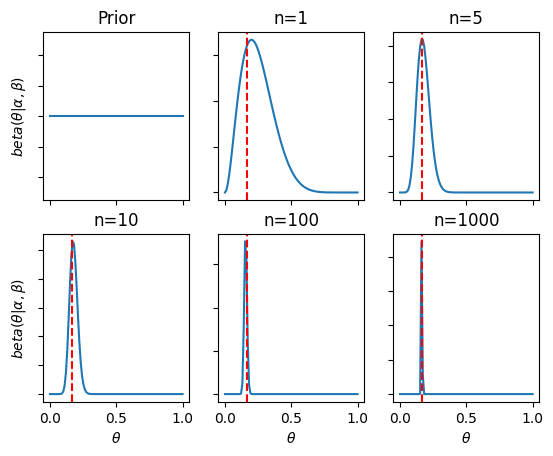

In [102]:
### BEGIN SOLUTION
EVAL_POINTS = [1, 5, 10, 100, 1000]

def plot_beta_distribution(ax, alpha, beta):
    # We plot the beta distribution on the interval [0, 1]
    x = np.linspace(0, 1, 100)
    y = beta_dist.pdf(x, alpha, beta)
    ax.plot(x, y)
    return ax


def calculate_posterior(alpha, beta, data, n):
    new_alpha = alpha + np.sum(data)
    new_beta = beta + n * data.size - np.sum(data)
    return new_alpha, new_beta


alpha, beta = 1., 1.
fig, axs = plt.subplots(2, 3)
ax = plot_beta_distribution(axs[0, 0], alpha, beta)
ax.set_title("Prior")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel(r"$beta(\theta|\alpha, \beta)$")
axs[1, 0].set_ylabel(r"$beta(\theta|\alpha, \beta)$")

# Ax idx as list
axs = axs.flatten()
for i, (ax, n) in enumerate(zip(axs[1:], EVAL_POINTS)):
    alpha, beta = calculate_posterior(alpha, beta, DATA[:n], 10)
    ax = plot_beta_distribution(ax, alpha, beta)
    ax.axvline(
        maximum_likelihood_estimator(DATA),
        color="red",
        linestyle="--",
    )
    ax.set_title(f"n={n}")
    ax.set_yticklabels([])
    if i <= 1:
        # Remove x-tick labels
        ax.set_xticklabels([])
    else:
        ax.set_xlabel(r"$\theta$")

plt.show()
### END SOLUTION

### BEGIN SOLUTION
We can see how our belief over $\theta$ is gradually updated as more data is observed.
In the beginning, we have a uniform belief over $\theta$ (prior), but as we observe more data, our belief becomes more and more peaked around the true value of $\theta$, which is $\frac{1}{6}$ as we have a fair die.
Contrary to maximum likelihood estimation, we do not only estimate a single value for $\theta$, but rather a distribution over $\theta$.
This distribution encodes our uncertainty about the true value of $\theta$.
### END SOLUTION